# Nama : Bayu Setia
# NPM : 5220411240

## Latihan 4.4 Kmeans

In [179]:
# import Library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [180]:
# from sklearn.metrics import accuracy_score
X = np.array([[1,2],[5,8],[1.5,1.8],[8,8],[6,7],[9,11]])
X

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 6. ,  7. ],
       [ 9. , 11. ]])

In [181]:
# Membuat array numpy dengan nilai [0,0,1,0,1,1] dan menetapkannya ke variabel labelX
labelX = np.array([0,0,1,0,1,1])

# Menampilkan isi dari variabel labelX
labelX

array([0, 0, 1, 0, 1, 1])

In [182]:
# Membuat objek KMeans dengan jumlah cluster (n_clusters) sebanyak 2
kmeans = KMeans(n_clusters=2)

# Melakukan proses clustering terhadap data X
kmeans.fit(X)

# Mengambil pusat cluster yang telah dihitung oleh algoritma K-Means
centroids = kmeans.cluster_centers_

# Mengambil label dari setiap data point
labels = kmeans.labels_

In [183]:
print(f'Centroids : {centroids}')
print(f'Labels : {labels}')

Centroids : [[7.   8.5 ]
 [1.25 1.9 ]]
Labels : [1 0 1 0 0 0]


coordinate : [1. 2.], label : 1
coordinate : [5. 8.], label : 0
coordinate : [1.5 1.8], label : 1
coordinate : [8. 8.], label : 0
coordinate : [6. 7.], label : 0
coordinate : [ 9. 11.], label : 0


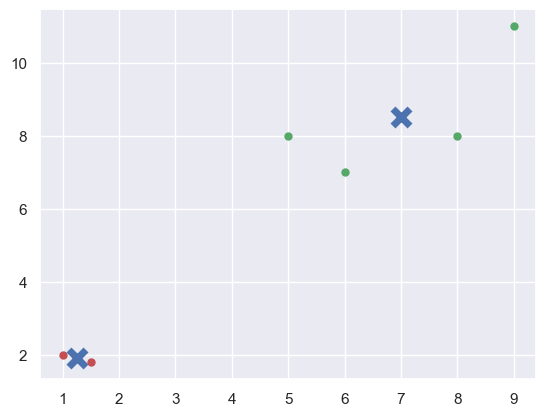

In [184]:
# Mendefinisikan list warna untuk visualisasi
colors = ['g.','r.','c.','y.']

# Melakukan iterasi sebanyak jumlah data point dalam X
for i in range(len(X)):
  # Mencetak koordinat dan label cluster dari setiap data point
  print(f'coordinate : {X[i]}, label : {labels[i]}')
  
  # Membuat plot untuk setiap data point dengan warna sesuai label cluster
  plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)

# Membuat scatter plot untuk pusat cluster dengan marker 'x', ukuran 150, lebar garis 5, dan zorder 10
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, linewidths=5, zorder=10)

# Menampilkan plot
plt.show()

In [185]:
# Menggunakan model kmeans untuk memprediksi cluster dari data baru [[5,6]]
prediction = kmeans.predict([[5,6]])

# Mencetak hasil prediksi
print(prediction)

[0]


In [186]:
print(kmeans.predict(X))

[1 0 1 0 0 0]


In [187]:
print(labelX)

[0 0 1 0 1 1]


## Tugas 4.5 Kmeans

In [188]:
# Mengimpor fungsi accuracy_score dan confusion_matrix dari modul sklearn.metrics
from sklearn.metrics import accuracy_score,confusion_matrix

# Menghitung akurasi dari model kmeans dengan membandingkan label sebenarnya (labelX) dan label yang diprediksi oleh model (kmeans.predict(X))
score = accuracy_score(labelX,kmeans.predict(X))

# Mencetak nilai akurasi
print(score)

0.5


In [189]:
# Menghitung confusion matrix dari model kmeans dengan membandingkan label sebenarnya (labelX) dan label yang diprediksi oleh model (kmeans.predict(X))
score1 = confusion_matrix(labelX,kmeans.predict(X))

# Mencetak confusion matrix
print(score1)

[[2 1]
 [2 1]]


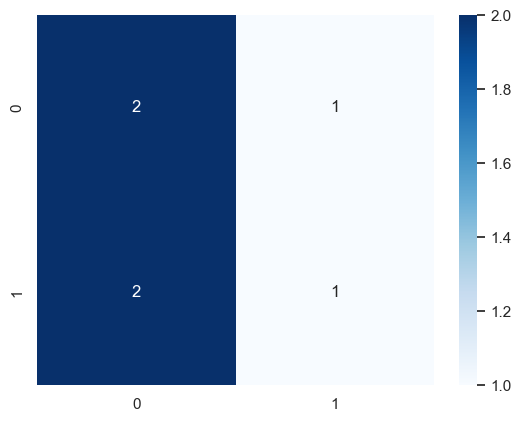

In [190]:
# Mengimpor modul seaborn sebagai sns dan mengatur default style
import seaborn as sns; sns.set()

# Membuat heatmap dari confusion matrix (score1) dengan annotation (annot) di set True untuk menampilkan nilai data,
# format (fmt) 'd' untuk integer, dan color map (cmap) 'Blues'
ax = sns.heatmap(score1, annot=True, fmt='d', cmap='Blues')

# Tugas

In [191]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [192]:
# Membaca Data
df = pd.read_csv('dataset/diabetes.csv')


In [193]:
# Menampilkan Data
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Status
0,148,72,35,0,33.6,0.627,50,Positive
1,85,66,29,0,26.6,0.351,31,Negative
2,183,64,0,0,23.3,0.672,32,Positive
3,89,66,23,94,28.1,0.167,21,Negative
4,137,40,35,168,43.1,2.288,33,Positive
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,Negative
764,122,70,27,0,36.8,0.340,27,Negative
765,121,72,23,112,26.2,0.245,30,Negative
766,126,60,0,0,30.1,0.349,47,Positive


In [194]:
#cek missing values
print(f'Apakah ada data yang missing values : {df.isnull().values.any()}')


Apakah ada data yang missing values : False


In [195]:
# mengecek missing values pada setiap kolom
print("Jumlah missing value untuk setiap kolom:")
print(df.isnull().sum())

Jumlah missing value untuk setiap kolom:
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Status                      0
dtype: int64


In [196]:
# Mengganti semua nilai 0 pada kolom 'Glucose' dengan rata-rata (mean) dari kolom 'Glucose'
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())

# Mengganti semua nilai 0 pada kolom 'BloodPressure' dengan rata-rata (mean) dari kolom 'BloodPressure'
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())

# Mengganti semua nilai 0 pada kolom 'SkinThickness' dengan rata-rata (mean) dari kolom 'SkinThickness'
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

# Mengganti semua nilai 0 pada kolom 'Insulin' dengan rata-rata (mean) dari kolom 'Insulin'
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())

# Mengganti semua nilai 0 pada kolom 'BMI' dengan rata-rata (mean) dari kolom 'BMI'
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [197]:
# Menampilkan statistik deskriptif dari DataFrame
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


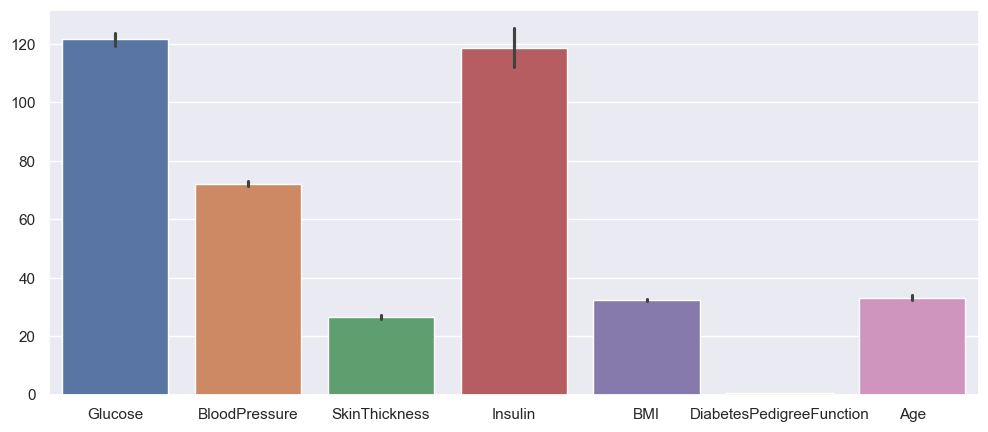

In [198]:
# Membuat figure baru dengan ukuran 12x5
plt.figure(figsize=(12,5))

# Membuat bar plot dari semua kolom dalam DataFrame df menggunakan seaborn
sns.barplot(data=df)

# Menampilkan plot
plt.show()

In [199]:
# Mengambil semua kolom kecuali kolom terakhir dari DataFrame df dan menetapkannya ke variabel X. 
# Ini biasanya digunakan untuk mengekstrak fitur dari dataset.
X = df.iloc[:,:-1]

# Mengambil kolom terakhir dari DataFrame df dan menetapkannya ke variabel y. 
# Ini biasanya digunakan untuk mengekstrak label atau target dari dataset.
y = df.iloc[:,-1]

# Membagi dataset menjadi set pelatihan dan set pengujian. 
# 80% data digunakan untuk pelatihan dan 20% sisanya digunakan untuk pengujian.
# random_state=12 digunakan untuk memastikan bahwa pembagian data konsisten di setiap run.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)

In [200]:
# Mengimpor modul pickle
import pickle

# Membuat objek StandardScaler yang akan digunakan untuk penskalaan
scaler = StandardScaler()

# Mendefinisikan fungsi untuk penskalaan fitur menggunakan StandardScaler
def scaler_standard(X_train,X_test):
  # Menggunakan metode fit_transform untuk menghitung rata-rata dan standar deviasi dari X_train 
  # untuk kemudian digunakan dalam penskalaan X_train
  X_train_scaled = scaler.fit_transform(X_train)
  
  # Menggunakan metode transform untuk penskalaan X_test berdasarkan rata-rata dan standar deviasi yang telah dihitung sebelumnya
  X_test_scaled = scaler.transform(X_test)

  # Mengembalikan X_train_scaled dan X_test_scaled
  return X_train_scaled,X_test_scaled

In [201]:
# Melakukan penskalaan pada X_train dan X_test menggunakan fungsi scaler_standard
X_train_scaled,X_test_scaled = scaler_standard(X_train,X_test)

In [202]:
from sklearn.cluster import KMeans

# Inisialisasi model K-Means dengan jumlah kluster yang diinginkan
kmeans = KMeans(n_clusters=2, random_state=42)

# Melakukan fitting model K-Means pada data latihan yang telah discaling
kmeans.fit(X_train_scaled)

# Melakukan prediksi pada data uji
y_pred = kmeans.predict(X_test_scaled)

# Mengonversi label yang sebenarnya (y_true) menjadi angka menggunakan LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Evaluasi hasil prediksi
accuracy = accuracy_score(y_true_encoded, y_pred)
conf_matrix = confusion_matrix(y_true_encoded, y_pred)
class_report = classification_report(y_true_encoded, y_pred)

# Menampilkan hasil evaluasi
print("Accuracy Score:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy Score: 0.7467532467532467
Confusion Matrix:
[[74 25]
 [14 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        99
           1       0.62      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.76      0.75      0.75       154

